In [2]:
import cv2
import numpy as np

In [3]:
from IPython.display import display, Image

def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

In [53]:
def fit_size(image, h, w):
    size = img.shape[:2]
    f = min(h / size[0], w / size[1])
    return cv2.resize(image, (int(size[1] * f), int(size[0] * f)), interpolation=cv2.INTER_AREA)

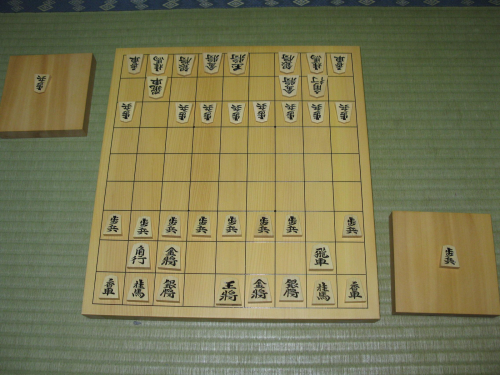

In [74]:
filename = 'images/photo_10.jpg'
img = cv2.imread(filename)
img = fit_size(img, 500, 500)
display_cv_image(img)

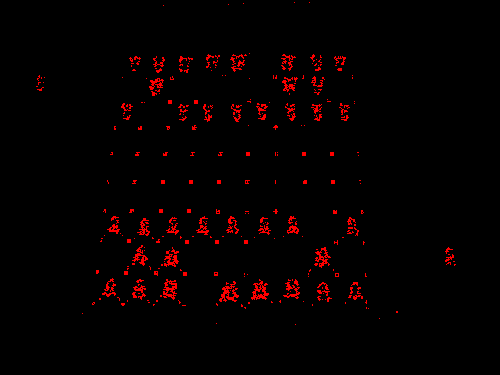

In [92]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
corners = cv2.cornerHarris(gray, 2, 3, 0.04)
dot_img = np.copy(img)
dot_img[corners > 0.01 * corners.max()] = [0, 0, 255]
# display_cv_image(dot_img)

blank = np.zeros(img.shape, np.uint8)
blank[corners > 0.01 * corners.max()] = [0, 0, 255]
display_cv_image(blank)

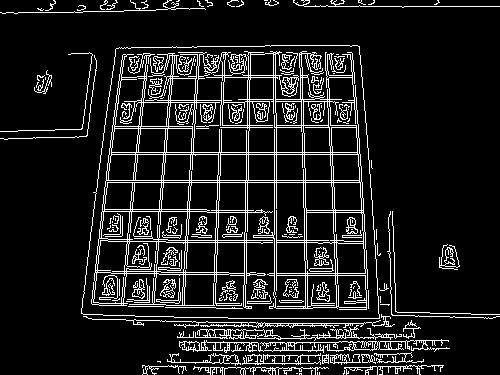

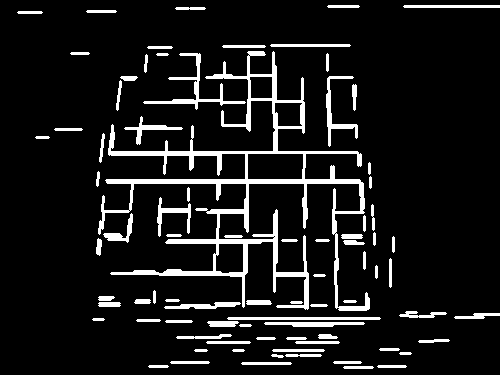

In [128]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
display_cv_image(edges)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 80, 100, 10)
blank = np.zeros(img.shape, np.uint8)
for x1, y1, x2, y2 in lines[:, 0]:
    cv2.line(blank, (x1, y1), (x2, y2), (255, 255, 255), 2)
display_cv_image(blank)